In [1]:
import datasets
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
datasets.HF_DATASETS_OFFLINE = 1
dataset = datasets.load_dataset("cc100",lang="en")

Using custom data configuration en-lang=en


Generating train split: 0 examples [00:00, ? examples/s]

Dataset cc100 downloaded and prepared to C:\Users\81702\.cache\huggingface\datasets\cc100\en-lang=en\0.0.0\8159941b93eb06d0288bb80be26ddfe8213c0c5e33286619c85ad8e1ee0eb91c. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
%store dataset

Stored 'dataset' (DatasetDict)


In [214]:
#get pretrained BERT like model
from transformers import BertTokenizer,BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## functions

In [227]:
#extract sentences which include token from dataset
def extract_token(token,max_texts,max_loop):
    texts = []
    for i in range(max_loop):
        text = dataset["train"][i]["text"]
        if token in text:
            texts.append(text.replace("\n",","))
            if len(texts) == max_texts:
                break
    print(len(texts))
    return texts

In [221]:
#get representation vector of token
def get_vector_rep(texts,token,add):
    token_num = tokenizer.encode(token)[1]
    token_num_s = tokenizer.encode(token+add)[1]
    vectors = []
    texts_index = []
    for i in range(len(texts)):
        x = tokenizer.encode(texts[i])
        if token_num in x:
            token_index = x.index(token_num)
            inputs = torch.tensor(x).unsqueeze(0)
            outputs = model(inputs)
            last_hidden_states = outputs[0]
            token_vector = last_hidden_states[0,token_index,:]
            vectors.append(token_vector.detach().numpy())
            texts_index.append(i)
        elif token_num_s in x:
            token_index = x.index(token_num_s)
            inputs = torch.tensor(x).unsqueeze(0)
            outputs = model(inputs)
            last_hidden_states = outputs[0]
            token_vector = last_hidden_states[0,token_index,:]
            vectors.append(token_vector.detach().numpy())
            texts_index.append(i)
    return np.array(vectors),texts_index

## Experiment
### pretty

In [228]:
texts_pre = extract_token("pretty",200,100000)

200


In [225]:
vectors,texts_index  = get_vector_rep(texts_pre,"pretty","")
print(vectors.shape)

(200, 768)


In [210]:
#manually labeled them into 3 categories(1:cute,beautiful,2:fairly,0:other,unknown)
labels = []
for i in texts_index:
    print(texts_pre[i],i,end="")
    label = int(input())
    if label == 99:
        break
    labels.append(label)
print(labels)

2. he cant control that, so its pretty low., 02
ACTUALLY!! he admitted himself he was g*y, umm no hes not smart, he ran into a glass door, hmm lets see what else, umm he started his own nail polish brand which comes out in a couple weeks, i think that pretty much says it all right their!!, 12
Weird thing is that I'm pretty scared of needles., 22
Only my ear was pierced, but has pretty much sealed now after I fell out of love with it., 32
I had one of those once, but the ex just thought it felt strange so I got rid lol. To be fair it was pretty bulky whilst I was wearing it too...I'm sure women would get more of a kick out of them though!, 42
I love getting piercings, and I'm pretty fond of them once they're in and healed, but..., 52
The last couple of years I've done pretty terribly. I haven't correctly predicted a winner since Jennifer Egan's (I hadn't read The Orphan Master's Son when it won, but it has since become one of my favorite books, period). I was proud to correctly predict 

I consider myself simply pretty. I can't say anything more. Average look., 321
1. Do you know your astrological (zodiac sign? How well do you fit the type?: I'm a Virgo! I git it pretty well., 332
7. Are you eloquent or inarticulate? Under what circumstances might this change? I am pretty articulate, but the only circumstance it would change if I had to keep spelling out a word in my head..., 342
5. What are your areas of expertise? What, if anything, are you interested in learning more about? I can cook fairly well, I can also edit a film pretty easily... I would love to learn to cook other dishes, and actually make better movies., 352
14. What do you fear? This may sound pretty crazy, but I am afraid of not being committed to something/someone, I have a raging fear of giant slides you find at carnivals (Fractured my leg on one when I was almost 12, never been on one since then.) and I am batshit scared by The Scarecrow in the Batman series..., 362
1. What is your financial situation?

I saw these a couple of weeks ago and was devastated that I couldn’t eat them, they sounded so good! Looks like I didn’t miss out on much. I picked up some pigs in blankets tortilla crisps from the co-op this week and they had the same overpowering flavour, weren’t greasy though so they were pretty good in a small portion x, 1012
I love you too, Gabby and I am going to send you an email back pretty soon! I think I should write more first-person things. I think this is a good idea., 1022
At the end of World War II, everything in Europe was pretty decimated; England, Germany, Italy, France, you, 1032
Maybe, maybe not. What I am pretty sure about, though,, 1042
It pretty simple to do, but not knowing which make/model washer you have,, 1052
like human body parts. So they’ve got the «gore» part pretty well covered, but for a re, 1062
ABs. Agreed, they made things pretty hard for themselves in the semi final with, 1072
was getting pretty obvious that my belly was growing, and it wasn just fa

I have been making some progress on Autumn Rose, despite feeling kind of blah and having much to do. I'm almost to the bind off and casting on for the neck steek, which means I'm also pretty close to attaching the sleeves and entering the home stretch., 1732
I am debt free. Started doing some form of grunt work at a TV station, but pretty quickly moved up to Associate Producer in the third largest US market., 1742
You picked the hardest profession in the world to be successful in, but if you want to go for it, start taking acting classes and move to a city where you can start auditioning for roles. Go on LOTS of auditions. Isn’t there a pretty healthy film industry in India?, 1752
England has a pretty strong film community as far as I know. I would guess that it’s all in London. I would check to see if there is a Film Commission in London or in your local area and just volunteer! Don’t wait until you are here to start learning., 1762
My first language is French , I speak pretty good En

(159, 2)


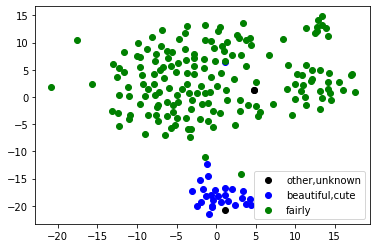

In [230]:
pretty_labels = np.array(labels)
#dimentionality reduction by t-SNE
t_sne_pre = TSNE(random_state=0).fit_transform(vectors)
print(t_sne.shape)

fig, ax = plt.subplots()
#ax.scatter(t_sne[:,0], t_sne[:,1],c=labels)
ax.scatter(t_sne_pre[pretty_labels==0,0], t_sne_pre[pretty_labels==0,1], c='black')
ax.scatter(t_sne_pre[pretty_labels==1,0], t_sne_pre[pretty_labels==1,1], c='blue')
ax.scatter(t_sne_pre[pretty_labels==2,0], t_sne_pre[pretty_labels==2,1], c='green')
ax.legend(("other,unknown","beautiful,cute","fairly"),loc='lower right')
plt.show()

### right

In [229]:
token = "right"
texts = extract_token(token,200,10000)

194


In [232]:
vectors,texts_index  = get_vector_rep(texts,token,"s")
print(vectors.shape)

(159, 768)


In [145]:
#manually labeld them into 5 categories (1:immediately,2:privilege,3:correct,4:opposite direction of left,0:other,unknown)
labels = []
for i in texts_index:
    print(texts[i],i,end="")
    label = int(input())
    if label == 99:
        break
    labels.append(label)
print(labels)

If you ever want to prove him wrong,I'm right here Bendy,at the back of this very long queue :D, 01
-He pretends to be an activist for g*y rights, when he hides his own bisexuality from the press. (He is in fact bisexual. Ask anyone who knew him from before he became famous.), 12
h**l if I know if he is g*y or not, just a little bit odd. Mostly I just hate his music, a bunch of sing-about-love stuff again. I get enough of that from way to many places. But I, in general, hate alot of what play on a couple radio stations around me, so its not really targeted right at beiber., 20
ACTUALLY!! he admitted himself he was g*y, umm no hes not smart, he ran into a glass door, hmm lets see what else, umm he started his own nail polish brand which comes out in a couple weeks, i think that pretty much says it all right their!!, 30
As a company, we adapt to change – in fact, more often than not, we are the change. Where others see challenges, we see opportunities. We’re a high-tech company, but we s

However, once we got inside, we were greeted by one of the planners (a lady we talk to every time we go. She even told us she hoped she would see us this auction and thought about us when they announced they were doing another auction in Dallas... awww we made friends!) so we felt right at home and started looking around., 490
It's been a rough week for Instagram. First they came out with a new terms of service that suggested the right to let companies use people's photos for advertisements without the user's permission. Then everyone started freaking out and debating whether or not to leave the onl ...more, 522
The project was run as a collaboration between the Triangle Project – a Cape Town-based non-profit organisation offering services to protect and promote the human rights of lesbian, gay, bisexual, transgender, intersex and queer (LGBTIQ+) people – and UCT, a partnership that was brought together by the UCT Knowledge Co-Op., 532
In an ideal world, it is recommended to save one-t

I do not even know how I finished up right here, but I assumed this post was once great., 860
However, the attorney, you should find a specialized understanding of the civil-rights laws., 872
plus have a very good notion of if they are the right choice for you after reviewing this informative article., 883
causes trouble to you, or the right choice., 893
The current favorite right now is Zombies Live, and they are, 901
the NHS at the moment, with regards to National healthcare, you're dead right!, 913
We all know that classics worth more than the normal ones right., 920
likely be right up your street. This is further expandable up to 32 GB via inserting a micro - SD card., 930
It's an e-book, written by a former sciatica sufferer. I admit, I learned a lot from him. He taught me almost everything about sciatica and how to cure it. I followed everything carefully and I've got prompt results - I completely got rid of sciatica in only 1 week. Crazy right? Till now it's not coming back, so 

Good question! If you’re studying a practical subject, such as Vet Nursing or Allied Health, you’ll be required to complete Structured Workplace Learning (also known as a work placement) to get the hands-on experience you need. You’ll be responsible for setting this up but there is always help available to find the right workplace for you. Open Colleges also hosts workshops and conferences linked to a range of subjects to help build your skills and network with industry experts., 1460
These presentations are classified and categorized, so you will always find everything clearly laid out and in context. You are watching Carn Paper On Participatory action research presentation right now. We are staying up to date!, 1471
You're damn right. Even my girlfriend Kay Adams said something to the effect of how I feel which is why do I feel so good about Seattle after a loss?, 1480
right, my child!--the Emperor is a god!", 1520
they say is right," she thought, "it is not his fault--he has grown, 

(159, 2)


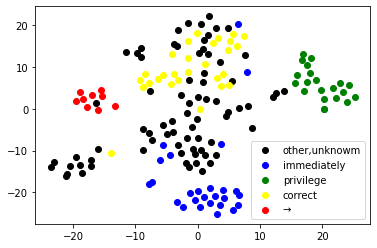

In [235]:
right_labels = np.array(labels)
#dimentionality reduction by t-SNE
t_sne = TSNE(random_state=0).fit_transform(vectors)
print(t_sne.shape)

fig, ax = plt.subplots()
ax.scatter(t_sne[right_labels==0,0], t_sne[right_labels==0,1], c='black')
ax.scatter(t_sne[right_labels==1,0], t_sne[right_labels==1,1], c='blue')
ax.scatter(t_sne[right_labels==2,0], t_sne[right_labels==2,1], c='green')
ax.scatter(t_sne[right_labels==3,0], t_sne[right_labels==3,1], c='yellow')
ax.scatter(t_sne[right_labels==4,0], t_sne[right_labels==4,1], c='red')
ax.legend(("other,unknowm","immediately","privilege","correct","→"),loc='lower right')
plt.show()

## Below are the installed libraries

In [1]:
!pip install datasets

In [34]:
!pip install transformers

In [35]:
!pip3 install torch torchvision